<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2026-1</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Joel Gómez Uribe
### Rodrigo Vega Vilchis
---

In [1]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# from scipy.special import legendre
# from scipy.special import eval_legendre

from ipywidgets import *
%matplotlib widget

# 2.1 Integración y Diferenciación numérica.

#### En este *Notebook* presentaremos diversos métodos para el cálculo de integrales y derivadas.


## Métedos de Integración numérica

## Cuadratura de Gauss 

---

#### Supongamos que deseamos calcular la integral de una función $f(x)$ (de una sola variable) con respecto a $x$ en un intervalo finito de $x=a$ hasta $x = b$, la cual denotamos como $I(a,b)$:
<h3 align="center">$
    \displaystyle I(a,b) = \displaystyle \int_{a}^{b} f(x) \,dx  
$</h3> 


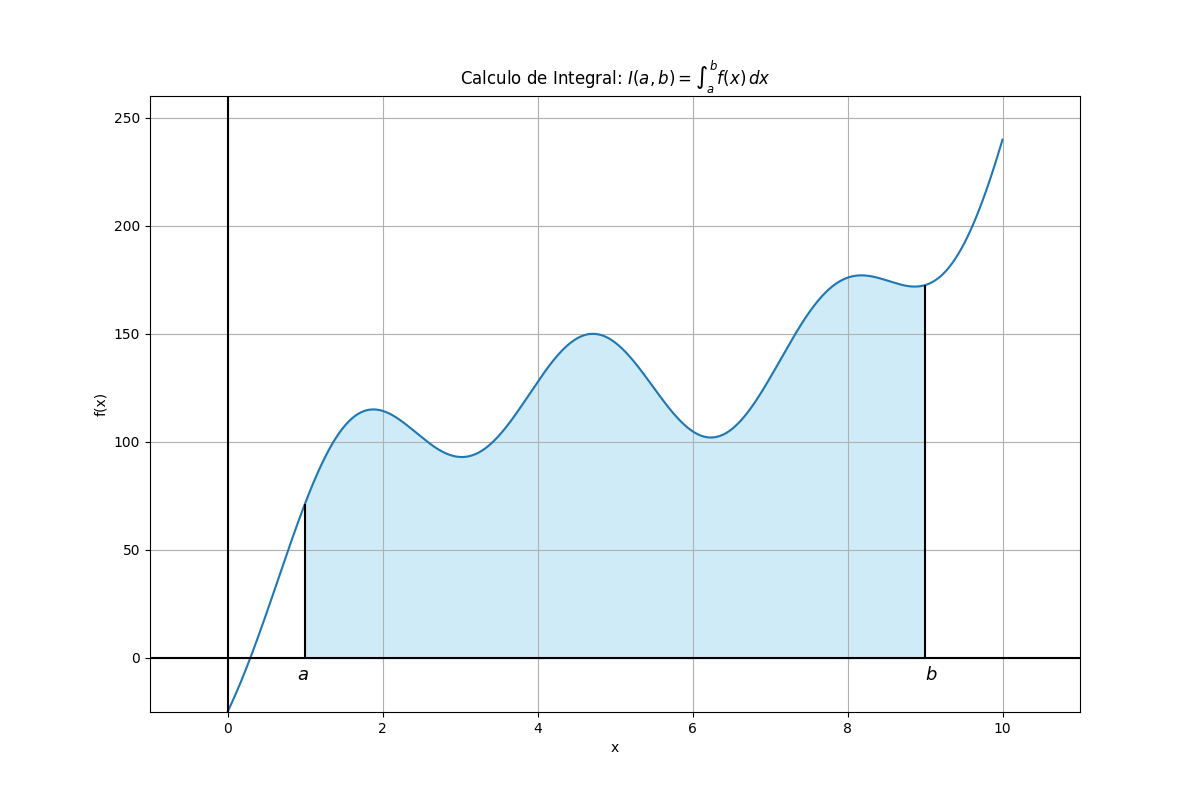

In [2]:
def f(x):
    return (x - 5)**3  + 50*(np.sin(x))**2 + 100

a,b = 1,9
X = np.linspace(0,10,1000)
Fx = f(X)

fig, ax = plt.subplots(figsize=((12,8)))

plt.plot(X,Fx)

plt.vlines(a,color='black', ymin=0.0, ymax=float(f(a)))
plt.vlines(b,color='black', ymin=0.0, ymax=float(f(b)))

Xf = X[(X >= a) & (X <= b)]
plt.fill_between(Xf,f(Xf), color='skyblue', alpha=0.4)

plt.xlim(-1, 11)
plt.ylim(-25, 260)
plt.text(a-0.1,-10,r'$a$', size=13)
plt.text(b,-10,r'$b$', size=13)

plt.title(r'Calculo de Integral: $I(a,b) = \int_{a}^{b} f(x) \,dx $')
plt.ylabel("f(x)")
plt.xlabel("x")
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

## Polinomios de Legendre

In [3]:
N = 10

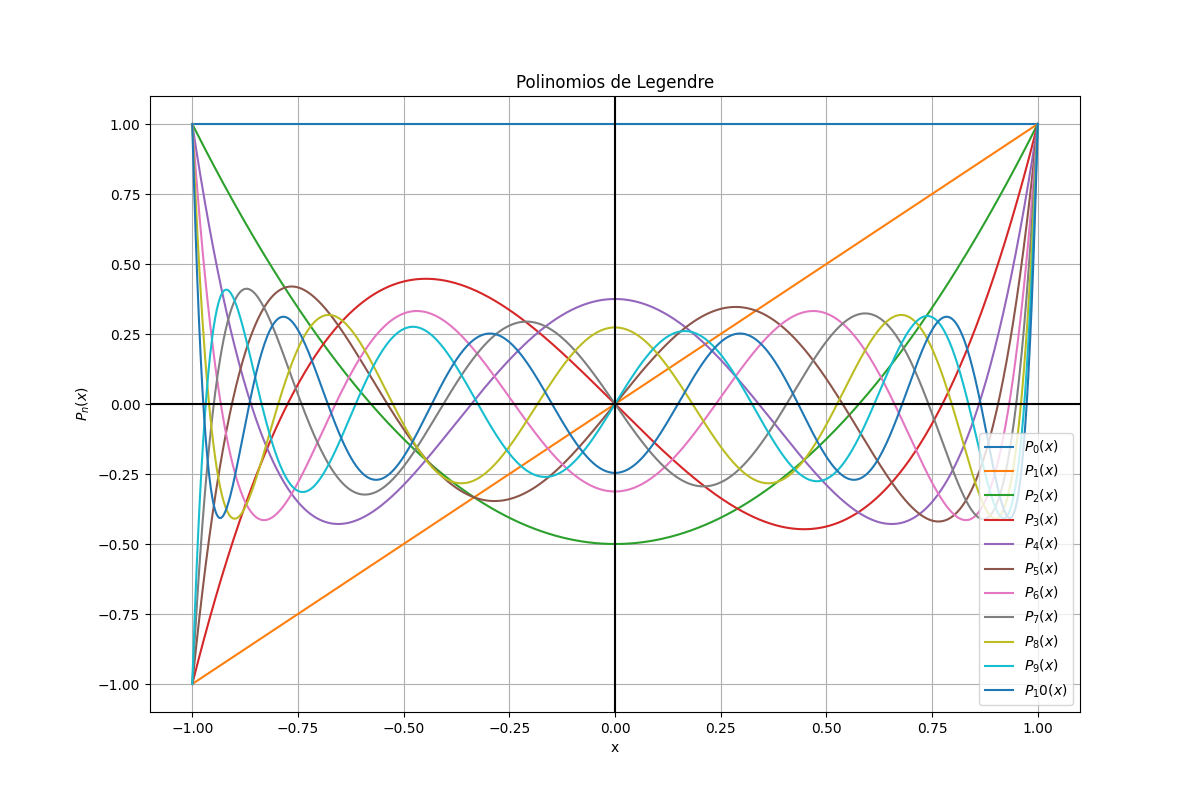

In [4]:
fig, ax = plt.subplots(figsize=((12,8)))

x = np.linspace(-1, 1, 1000)

for n in range(N+1):  # Grafica polinomios de Legendre de grado N
    y = sp.special.eval_legendre(n, x)
    plt.plot(x, y, label=r'$P_{}(x)$'.format(n))

plt.title("Polinomios de Legendre")
plt.xlabel("x")
plt.ylabel(r'$P_n(x)$')
plt.legend(loc='lower right')

plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

In [5]:
# sp.special.legendre?  # Regresa los coeficientes de los polinomios de Legendre de grado N
sp.special.legendre(N)

poly1d([ 1.80425781e+02, -4.00625713e-14, -4.27324219e+02, -2.80437999e-13,
        3.51914063e+02, -2.80437999e-13, -1.17304687e+02, -1.00156428e-14,
        1.35351562e+01,  5.47730467e-16, -2.46093750e-01])

In [94]:
# sp.special.roots_legendre?  # Regresa las raices (y sus pesos correspondientes) de los polinomios de Legendre de grado N
sp.special.roots_legendre(N)

(array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653]),
 array([0.06667134, 0.14945135, 0.21908636, 0.26926672, 0.29552422,
        0.29552422, 0.26926672, 0.21908636, 0.14945135, 0.06667134]))

interactive(children=(IntSlider(value=15, description='N', max=1000, min=1), Output()), _dom_classes=('widget-…

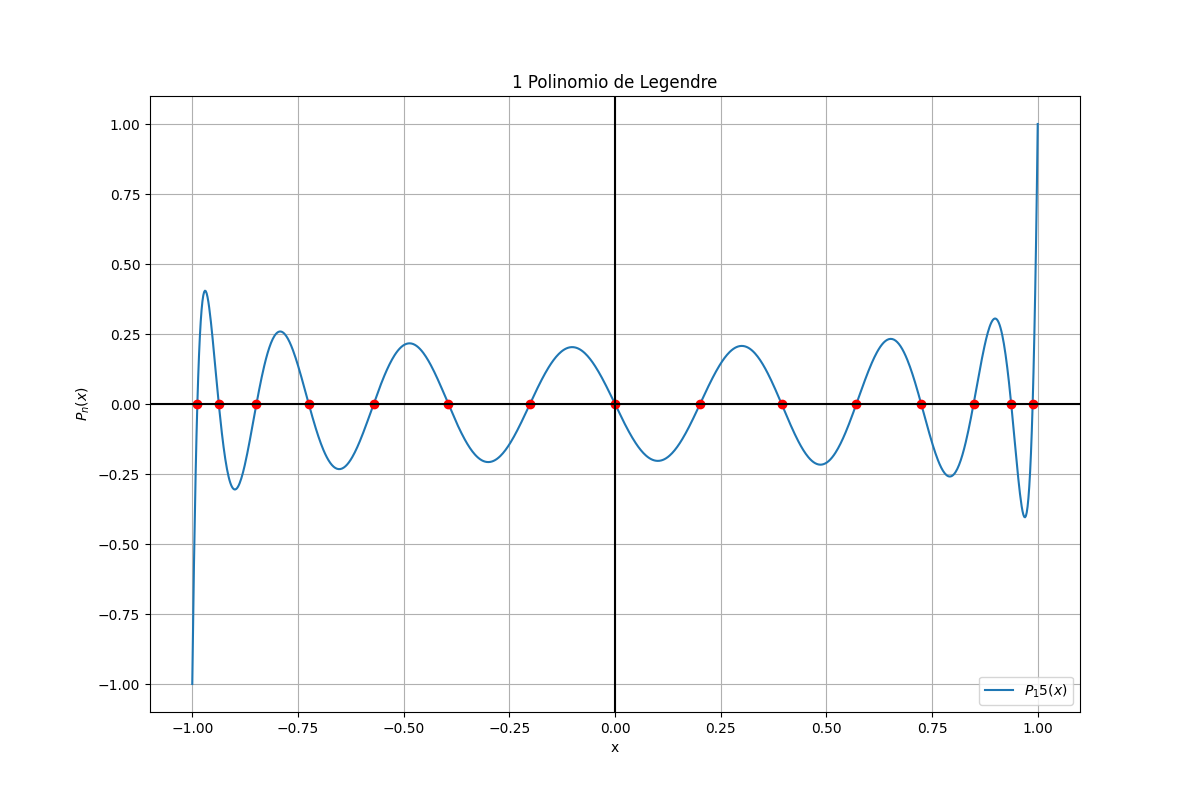

In [6]:
fig, ax = plt.subplots(figsize=((12,8)))

@widgets.interact(N=(1, 1000, 1))

def update(N = 15): 
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    if ( N > 100):
        pts = 10000
    else:
        pts = 1000

    X = np.linspace(-1, 1, pts)
    # L = Legendre(N,X)
    L = sp.special.eval_legendre(N, X)

    R,W = sp.special.roots_legendre(N)
    Z = np.zeros(len(R))
            
    plt.plot(X, L, label=r'$P_{}(x)$'.format(N))
    plt.plot(R,Z,'ro')
    
    plt.title("1 Polinomio de Legendre")
    plt.xlabel("x")
    plt.ylabel(r'$P_n(x)$')
    plt.legend(loc='lower right')
    
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
    plt.grid()

In [7]:
sp.special.roots_legendre(2)

(array([-0.57735027,  0.57735027]), array([1., 1.]))

### Recorrer Dominio

interactive(children=(IntSlider(value=15, description='N', min=1), IntSlider(value=-1, description='a', min=-1…

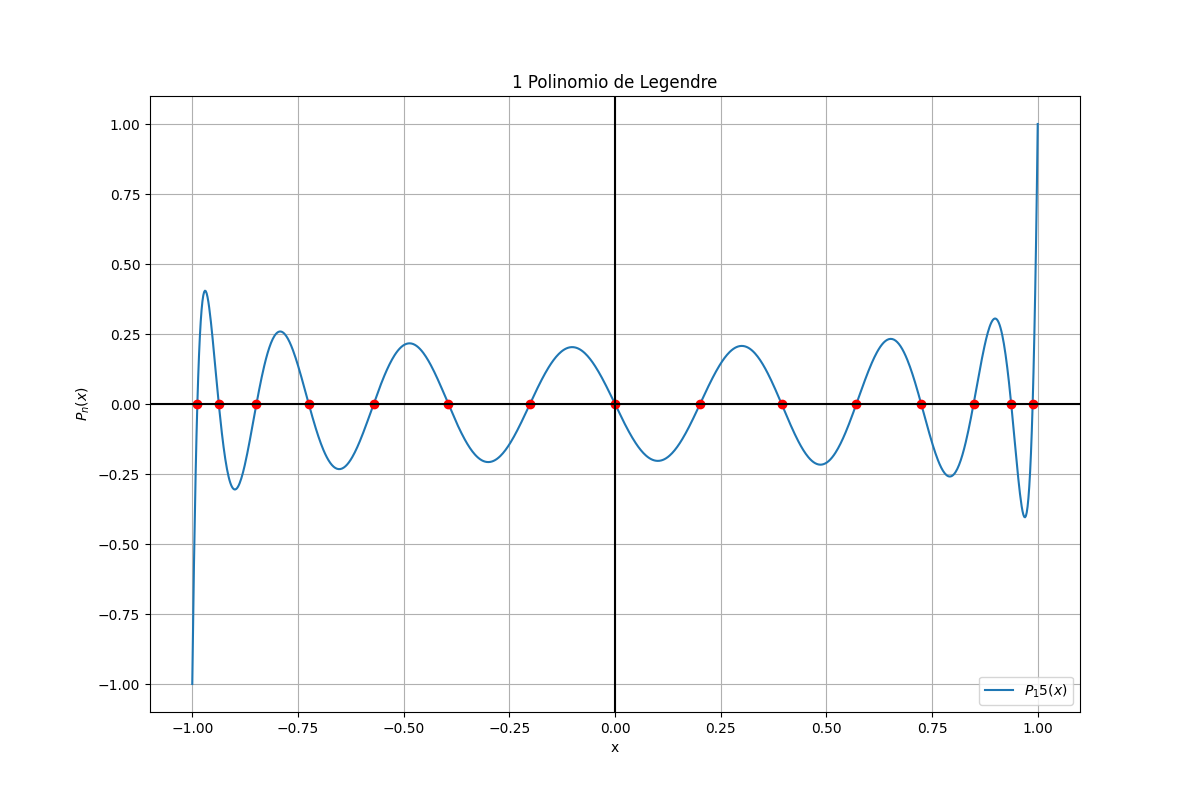

In [21]:
fig, ax = plt.subplots(figsize=((12,8)))


@widgets.interact(N=(1, 100, 1), a=(-100, 100, 1),b=(-100, 100, 1))

def update(N = 15, a = -1, b = -1):     
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    X = np.linspace(-1, 1, 1000)
    # L = Legendre(N,X)
    L = sp.special.eval_legendre(N, X)

    R,W = sp.special.roots_legendre(N)
    Z = np.zeros(len(R))

    if (a != -1 or b != -1):
        
        X2 = X*(b-a)/2 + (b+a)/2
        R2 = R*(b-a)/2 + (b+a)/2

        # L2 = L*(b-a)/2 + (b+a)/2    
        plt.plot(X2, L, label=r'$P_{}(x)$'.format(N))
        plt.plot(R2,Z,'ro')

    else:
            
        plt.plot(X, L, label=r'$P_{}(x)$'.format(N))
        plt.plot(R,Z,'ro')
    
    plt.title("1 Polinomio de Legendre")
    plt.xlabel("x")
    plt.ylabel(r'$P_n(x)$')
    plt.legend(loc='lower right')
    
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
    plt.grid()

### Como BASE del espacio Polinomios

In [9]:
def Legendre1(N,x):
    p = 0
    a = sp.special.legendre(N) ## 
    for i in range(N+1):
        p = p + a[i]*x**i
    return p


def Legendre2(N,X):
    p = sp.special.eval_legendre(N, X)
    return p

$P(x) = 3x^{2}-3x+5$

$\Rightarrow P(x)=2P_{2}(x)-2P_{1}(x)-6P_{0}(x)$

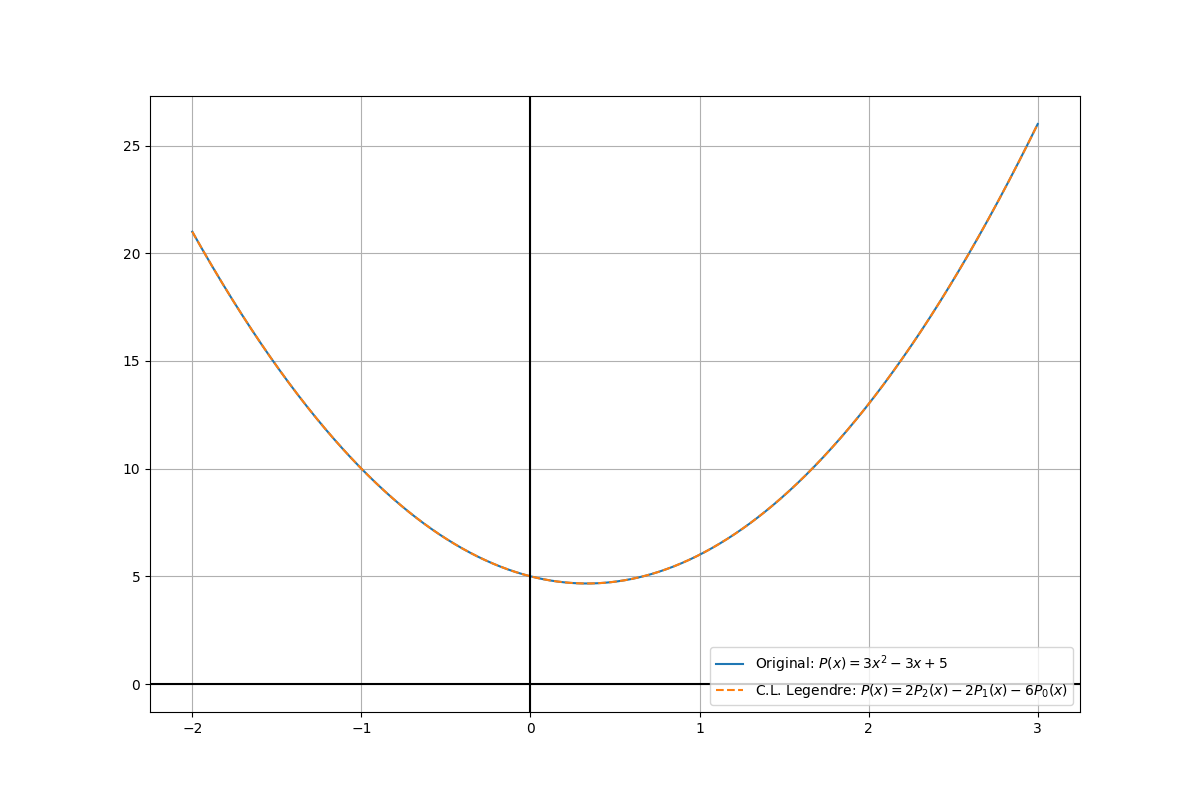

In [13]:
def pol(x):
    return 3*x**2 - 2* x + 5

fig, ax = plt.subplots(figsize=((12,8)))

Xp = np.linspace(-2, 3, 1000)
Yp = pol(Xp)
plt.plot(Xp,Yp,label="Original: "+r'$P(x) = 3x^{2}-3x+5$')

Yp2 = 2*Legendre1(2,Xp) - 2*Legendre1(1,Xp) + 6*Legendre1(0,Xp)
plt.plot(Xp,Yp2,linestyle='dashed',label="C.L. Legendre: "+r'$P(x)=2P_{2}(x)-2P_{1}(x)-6P_{0}(x)$')

plt.legend(loc='lower right')
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

$P(x) = (x-5)^{3}+100$

$P(x) = x^{3}-15x^{2}+75x-25$

$\Rightarrow P(x) = \frac{2}{5}P_{3}(x)-10P_{2}(x)+\frac{378}{5}P_{1}(x)-30P_{0}(x)$

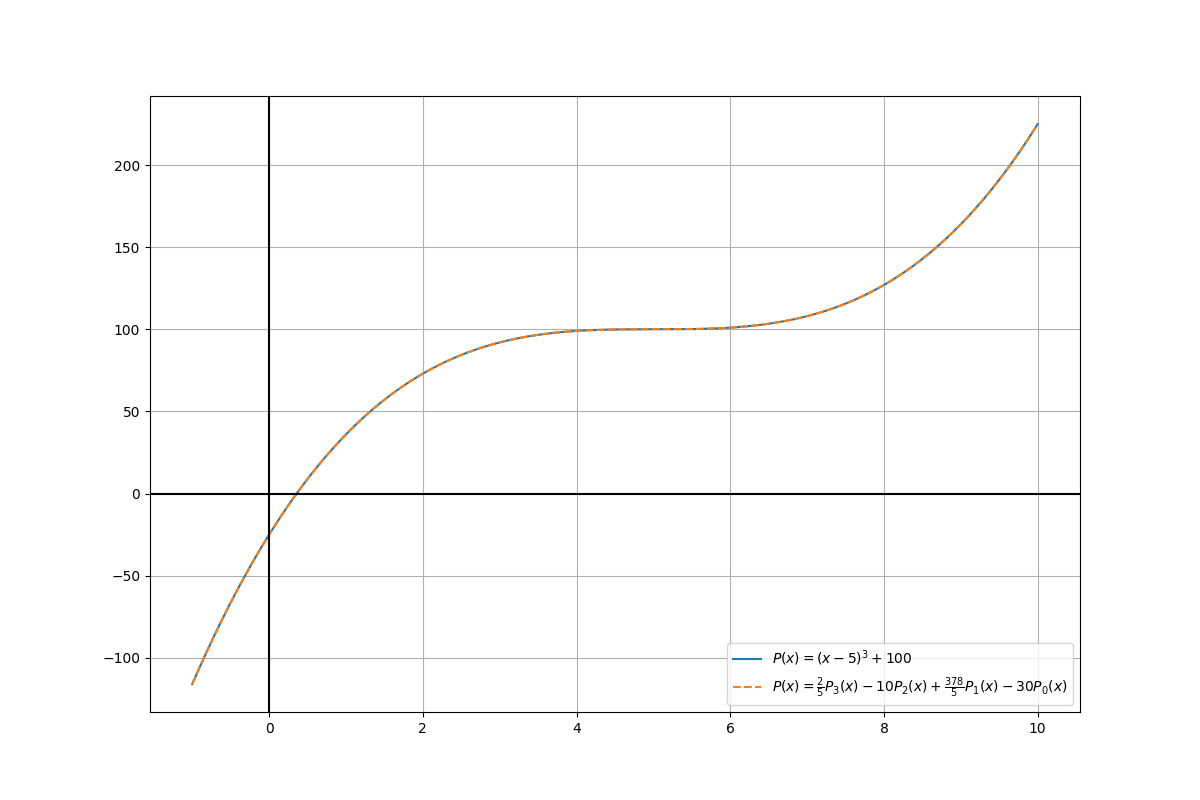

In [14]:
def pol2(x):
    return (x - 5)**3  + 100

def pol2B(x):
    return x**3 - 15*x**2 + 75*x -25

fig, ax = plt.subplots(figsize=((12,8)))

Xp = np.linspace(-1, 10, 1000)
Yp = pol2(Xp)
# Yp = pol2B(Xp)
plt.plot(Xp,Yp,label=r'$P(x) = (x-5)^{3}+100$')

Yp2 = (2/5)*Legendre1(3,Xp)- 10*Legendre1(2,Xp) + (378/5)*Legendre1(1,Xp) - 30*Legendre1(0,Xp)
plt.plot(Xp,Yp2,linestyle='dashed',label=r'$P(x) = \frac{2}{5}P_{3}(x)-10P_{2}(x)+\frac{378}{5}P_{1}(x)-30P_{0}(x)$')

plt.legend(loc='lower right')
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

### Raices y Pesos $x_i , w_i$

In [15]:
# sp.special.roots_legendre?  # Regresa las raices (y sus pesos correspondientes) de los polinomios de Legendre de grado N
sp.special.roots_legendre(N)

(array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653]),
 array([0.06667134, 0.14945135, 0.21908636, 0.26926672, 0.29552422,
        0.29552422, 0.26926672, 0.21908636, 0.14945135, 0.06667134]))

In [16]:
# np.polynomial.legendre.leggauss?  # Computes the sample points and weights for Gauss-Legendre quadrature.
np.polynomial.legendre.leggauss(N)

(array([-0.97390653, -0.86506337, -0.67940957, -0.43339539, -0.14887434,
         0.14887434,  0.43339539,  0.67940957,  0.86506337,  0.97390653]),
 array([0.06667134, 0.14945135, 0.21908636, 0.26926672, 0.29552422,
        0.29552422, 0.26926672, 0.21908636, 0.14945135, 0.06667134]))

### Es posible aprxomar la integral en el intervalo $[-1,1]$ de cualquier función, a partir de las **Raices y Pesos** de los Polinomios de Legendre (cuadratura).

<!-- <h4 align="center">$
    \displaystyle I(a,b) = \displaystyle \int_{a}^{b} f(x) \,dx  
$</h4>  -->
<h4>$
    \displaystyle \int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^N w_i f(x_i)
$</h4> 

$\;$

#### $N$ son los puntos muestra is the number of sample points used,

#### $w_i$ son los pesos de cuadratura, y

#### **$x_i$** son las raíces del n-ésimo polinomio de Legendre

$\;$

<h4>$
    \displaystyle w_i = \frac{2}{\left( 1 - x_i^2 \right) \left[P'_n(x_i)\right]^2}
$</h4> 



$f_1(x) = x^2 + 2$

$f_2(x) = x^2 +4x + 2$

$f_3(x) = cos(x)$

$f_4(x) = e^x cos(x)$

$f_5(x) = sen(\frac{1}{x})$

$f_6(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2}{\left( \frac{x-\mu}{\sigma} \right)^2}}$

$f_7(x) = (x-5)^3 + 50 sen^2(x) + 100$

In [17]:
def f1(x):
    return x**2 + 1

def f2(x):
    return x**2 + 4*x + 2

def f3(x):
    return np.cos(x)

def f4(x):
    return (np.e**x)*(np.cos(x))

def f5(x):
    return np.sin(1/x)

def f6(x,mu=0,s=1):
    return (1/(np.sqrt(2*np.pi*s**2)))*np.e**(-(1/2)*((x-mu)/s)**2)

def f7(x):
    return (x - 5)**3  + 50*(np.sin(x))**2 + 100

In [18]:
def Params(funcion):
    
    if (funcion=='f1'):
        f = f1
        X = np.linspace(-5,5, 1000)
        xlms = (-1.5, 1.5)
        ylms = (-0.5, 2.5)
        txtp = (-0.5, .5)
        tit = r'$ \int_{-1}^{1} -\frac{5}{2}x^2 + 5x \,dx $'
    elif (funcion=='f2'):
        f = f2
        X = np.linspace(-5,5, 1000)
        xlms = (-1.5, 1.5)
        ylms = (-1.5, 10)
        txtp = (-1.25, 6)
        tit = r'$ \int_{-1}^{1} x^2 +4x + 2 \,dx $'
    elif (funcion=='f3'):
        f = f3
        X = np.linspace(-5,5, 1000)
        xlms = (-3.5, 3.5)
        ylms = (-1.25, 1.25)
        txtp = (-1.25, -.5)
        tit = r'$ \int_{-1}^{1} cos(x) \,dx $'
    elif (funcion=='f4'):
        f = f4
        X = np.linspace(-5,5, 1000)
        xlms = (-3, 2)
        ylms = (-1, 2)
        txtp = (-2.5, 1.25)
        tit = r'$ \int_{-1}^{1} e^x cos(x) \,dx $'
    elif (funcion=='f5'):
        f = f5
        X = np.linspace(-5,5, 1000)
        xlms = (-2, 2)
        ylms = (-1.15, 1.15)
        txtp = (-1.75, .75)
        tit = r'$ \int_{-1}^{1} sen(\frac{1}{x}) \,dx $'      
    elif (funcion=='f6'):
        f = f6
        X = np.linspace(-5,5, 1000)
        xlms = (-4, 4)
        ylms = (-0.1, 0.5)
        txtp = (-3.5, .4)
        tit = r'$ \frac{1}{\sqrt{2\pi\sigma^2}} \int_{-1}^{1} e^{-\frac{1}{2}{\left( \frac{x-\mu}{\sigma} \right)^2}} \,dx $'
    elif (funcion=='f7'):
        f = f7
        X = np.linspace(-2,10, 1000)
        xlms = (-2, 11)
        ylms = (-100, 300)
        txtp = (2, 200)
        tit = r'$ \int_{-1}^{1} (x-5)^3 + 50 sen^2(x) + 100 \,dx $'     

    return f,X,xlms,ylms,txtp,tit


In [19]:
def IntegralW(f,N):
    I = 0
    L = sp.special.roots_legendre(N)
    
    for i in range(len(L[0])):
        x = L[0][i]
        w = L[1][i]
        
        I = I + w*f(x)
        
    return float(I)    

interactive(children=(IntSlider(value=5, description='N', max=20, min=1), Dropdown(description='funcion', opti…

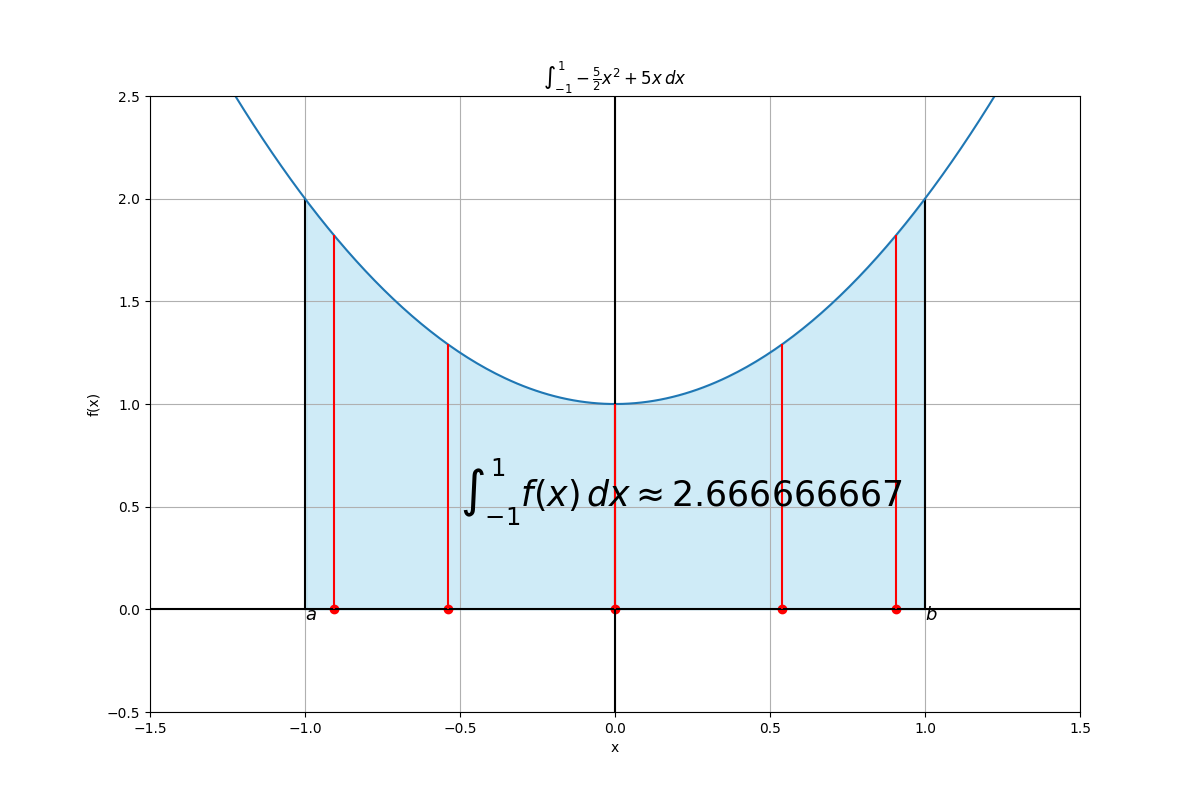

In [20]:
fig,ax = plt.subplots(figsize=((12,8)))

@widgets.interact(N=(1, 20, 1),funcion=['f1','f2','f3','f4','f5','f6','f7'],Pol=False,Calcs=False)

def update(N=5,funcion='f1',Pol=False,Calcs=False):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    a,b = -1,1

    f,X,xlms,ylms,txtp,tit = Params(funcion)  
    
    Y = f(X)
       
    xy1 = (a, 0)
    xy2 = (a, float(f(a)))
    plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]],color='black')
    
    xy1B = (b, 0)
    xy2B = (b, float(f(b)))
    plt.plot([xy1B[0], xy2B[0]], [xy1B[1], xy2B[1]],color='black')
    
    # plt.xlim(-2, 2)
    # plt.ylim(-1,f(2))

    plt.xlim(xlms)
    plt.ylim(ylms)    
    plt.text(a,-0.05,r'$a$', size=13)
    plt.text(b,-0.05,r'$b$', size=13)
    
    plt.plot(X,Y)
    Xf = X[(X >= a) & (X <= b)]
    plt.fill_between(Xf,f(Xf), color='skyblue', alpha=0.4)
    
    I = IntegralW(f,N)
    
    plt.text(txtp[0],txtp[1],r'$ \int_{-1}^{1} f(x) \,dx \approx $'+str(round(I,9)), size=25)
    
    RW = sp.special.roots_legendre(N)
    Z = np.zeros(len(RW[0]))
    plt.plot(RW[0],Z,'ro')

    if (Calcs):
        for i in range(len(RW[0])):
            print('x_'+str(i)+'= '+str(RW[0][i]),' w_'+str(i)+' = '+str(RW[1][i]))
            print('f(x_'+str(i)+') = '+str(f(RW[0][i])),' f(x_'+str(i)+')*w_'+str(i)+' = '+str(f(RW[0][i])*RW[1][i]),'\n')
    else: print('')

    plt.title(tit)
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
    plt.grid()

    for i in range(N):
        # plt.plot([R[i], R[i]],[R[0], f(R)[i]],color='r')
        plt.vlines(x=RW[0][i], color='r', ymin=0.0, ymax=f(RW[0][i]))
            
    if (Pol):
        Xl = np.linspace(-1,1,1000)
        Lx = Legendre2(N,Xl)  
        plt.plot(Xl,Lx, color='blue')    
    

    


# Cuadratura Gaussiana

---

<h4>$
    \displaystyle \int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^N w_i f(x_i)
$</h4> 

$\;$

$N$ son los puntos muestra is the number of sample points used,

$w_i$ son los pesos de cuadratura, y

$x_i$ son las raíces del n-ésimo polinomio de Legendre

$\;$

<h4>$
    \displaystyle w_i = \frac{2}{\left( 1 - x_i^2 \right) \left[P'_n(x_i)\right]^2}
$</h4> 


$\;$

#### Para asignar los puntos a un dominio general que va desde $x=a$ hasta $x=b$:

<h4>$
    \displaystyle \int_{a}^b f(x)\,dx \approx \sum_{i=1}^N w_i f(x_i)
$</h4> 

$\;$

<h4>$
        \displaystyle w'_k = \dfrac{(b - a)}{2} w_k
$</h4> 

<h4>$
         x'_k = \dfrac{(b - a)}{2}x_k + \frac{1}{2}(b + a)
$</h4> 
    
<!-- De manera similar, los pesos no cambian si simplemente deslizamos los \textit{puntos muestra} hacia arriba o hacia abajo en la línea $x$, pero si el ancho del dominio de integración cambia, entonces el valor de la integral aumentará o disminuirá en un factor correspondiente y, por lo tanto, los pesos tienen que ser re-escalados así:
 -->





In [25]:
def gauss_xw_ab(N,a,b):
    x,w = sp.special.roots_legendre(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [26]:
def CuadGauss(N,f,a,b):
    S = 0
    
    x,w = gauss_xw_ab(N,a,b)
    
    for i in range(N):
        S = S + w[i]*f(x[i])
        
    return float(S)


#### Como ejemplo usemos la siguiente función $f(x)$:
 
<h3 align="center">$
    \displaystyle f(x) = (x - 5)^3  + 50sen^2(x) + 100
$</h3> 

#### donde $a = 1$ y $b = 9$.

In [27]:
def f(x):
    return (x - 5)**3  + 50*(np.sin(x))**2 + 100

In [28]:
a = 1
b = 9
N = 100
x, w = gauss_xw_ab(N,a,b)

In [32]:
CuadGauss(N,f,a,b)

1020.7535584199669

In [33]:
# sp.integrate.quadrature(f,a,b)
sp.integrate.quad(f,a,b) 

(1020.7535584199669, 1.1332641029477945e-11)

interactive(children=(IntSlider(value=5, description='N', max=30, min=1), IntSlider(value=1, description='a', …

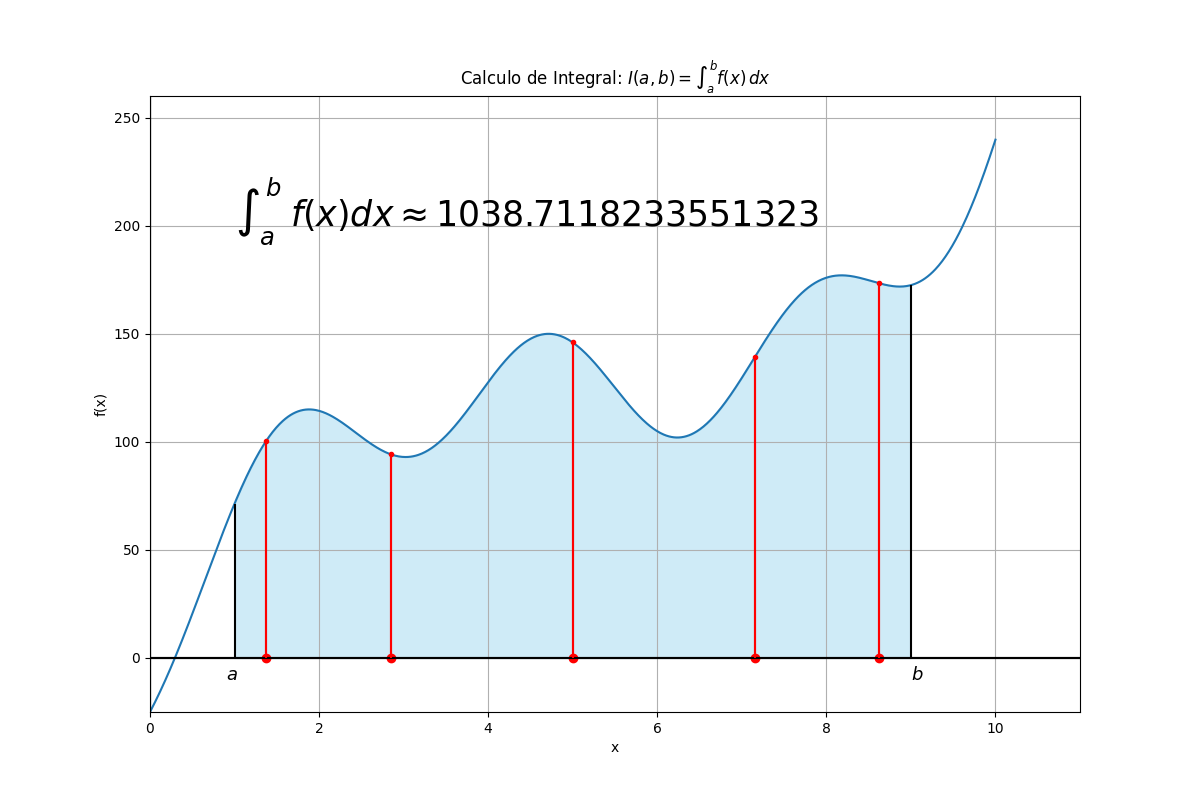

In [36]:
fig, ax = plt.subplots(figsize=((12,8)))

@widgets.interact(N=(1, 30, 1),a=(1, 9, 1),b=(2, 10, 1),Pol=False)

def update(N = 5, a = 1, b = 9,Pol=False):
    
    for artist in plt.gca().lines + plt.gca().collections:   #para limpiar la grafica
        artist.remove()
    ax.clear()

    h = (b-a)/N

    X = np.linspace(0, 10, 1000)
    Y = f(X)
    plt.plot(X,Y)
    Xf = X[(X >= a) & (X <= b)]
    plt.fill_between(Xf,f(Xf), color='skyblue', alpha=0.4)
    
    plt.xlim(0, 11)
    plt.ylim(-25, 260)

    # xy1 = (a, 0)
    # xy2 = (a, float(f(a)))
    # plt.plot([xy1[0], xy2[0]], [xy1[1], xy2[1]],color='black')
    plt.vlines(a,color='black', ymin=0.0, ymax=float(f(a)))
    
    # xy1B = (b, 0)
    # xy2B = (b, float(f(b)))
    # plt.plot([xy1B[0], xy2B[0]], [xy1B[1], xy2B[1]],color='black')
    plt.vlines(b,color='black', ymin=0.0, ymax=float(f(b)))
    
    plt.text(a-0.1,-10,r'$a$', size=13)
    plt.text(b,-10,r'$b$', size=13)

    RW = gauss_xw_ab(N,a,b)
    plt.plot(RW[0],f(RW[0]),'r.')
    Z = np.zeros(len(RW[0]))
    plt.plot(RW[0],Z,'ro')

    for i in range(N):
        plt.plot([RW[0][i], RW[0][i]],[RW[0][0], f(RW[0])[i]],color='r') 
    
    I = CuadGauss(N,f,a,b)

    plt.text(1,200,r'$ \int_a^b \; f(x) dx \approx $'+str(I), size=25)
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')

    plt.title(r'Calculo de Integral: $I(a,b) = \int_{a}^{b} f(x) \,dx $')
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
    plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
    plt.grid()

    for i in range(N):
        plt.vlines(x=RW[0][i], color='r', ymin=0.0, ymax=f(RW[0][i]))
            
    if (Pol):
        Xl = np.linspace(-1,1,1000)
        Lx = Legendre2(N,Xl)
        Xl2 = Xl*(b-a)/2 + (b+a)/2
        plt.plot(Xl2,Lx, color='blue')   

